In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
from collections import defaultdict
from peewee import SqliteDatabase, Model, IntegerField, BooleanField, DoubleField


db = SqliteDatabase('/tmp/foo.db')

class Timing(Model):
	block_size = IntegerField()
	file_size = IntegerField()
	compression = BooleanField()
	readahead = BooleanField()
	item_type = IntegerField()
	test = IntegerField()
	parameter = IntegerField()
	duration = DoubleField()
	timestamp = IntegerField()

	class Meta:
		database = db

In [13]:
def get_rows(database):
    db.database = database
    db.connect()
    db.create_table(Timing, safe=True)
    
    rows = list(Timing.select())
    
    db.close()
    
    return rows

In [37]:
def plot(X_axis, Y_axis, others, COLS, timings):
    plot_values = defaultdict(lambda: defaultdict(list))

    for name, database in timings:
        rows = get_rows(database)
        
        for r in rows:
            k = tuple(getattr(r, o) for o in others)
            plot_values[k][name].append((X_axis[1](r), Y_axis[1](r)))

    PLOTS = len(plot_values)
    ROWS = (PLOTS + COLS - 1) / COLS
    
    keys = sorted(plot_values.keys())

    plt.figure(figsize=(8, 40))

    for i, k in enumerate(keys):
        plt.subplot(ROWS, COLS, i + 1, title=', '.join(map(lambda x: '%s = %s' % (x[0], x[1]), zip(others, k))))
        xs = []
        ys = []
        for name, values in plot_values[k].items():
            x = list(map(lambda v: v[0], values))
            y = list(map(lambda v: v[1], values))
            xs += x
            ys += y
            
            plt.plot(x, y, '.-', label=name)
            plt.xlabel(X_axis[0])
            plt.ylabel(Y_axis[0])
            
            # plt.xscale('log')
            # plt.yscale('log')

        # plt.xticks(xs)
        # plt.yticks(ys)
        plt.legend()
        plt.grid()

    plt.tight_layout()
    return plt

<IPython.core.display.Javascript object>


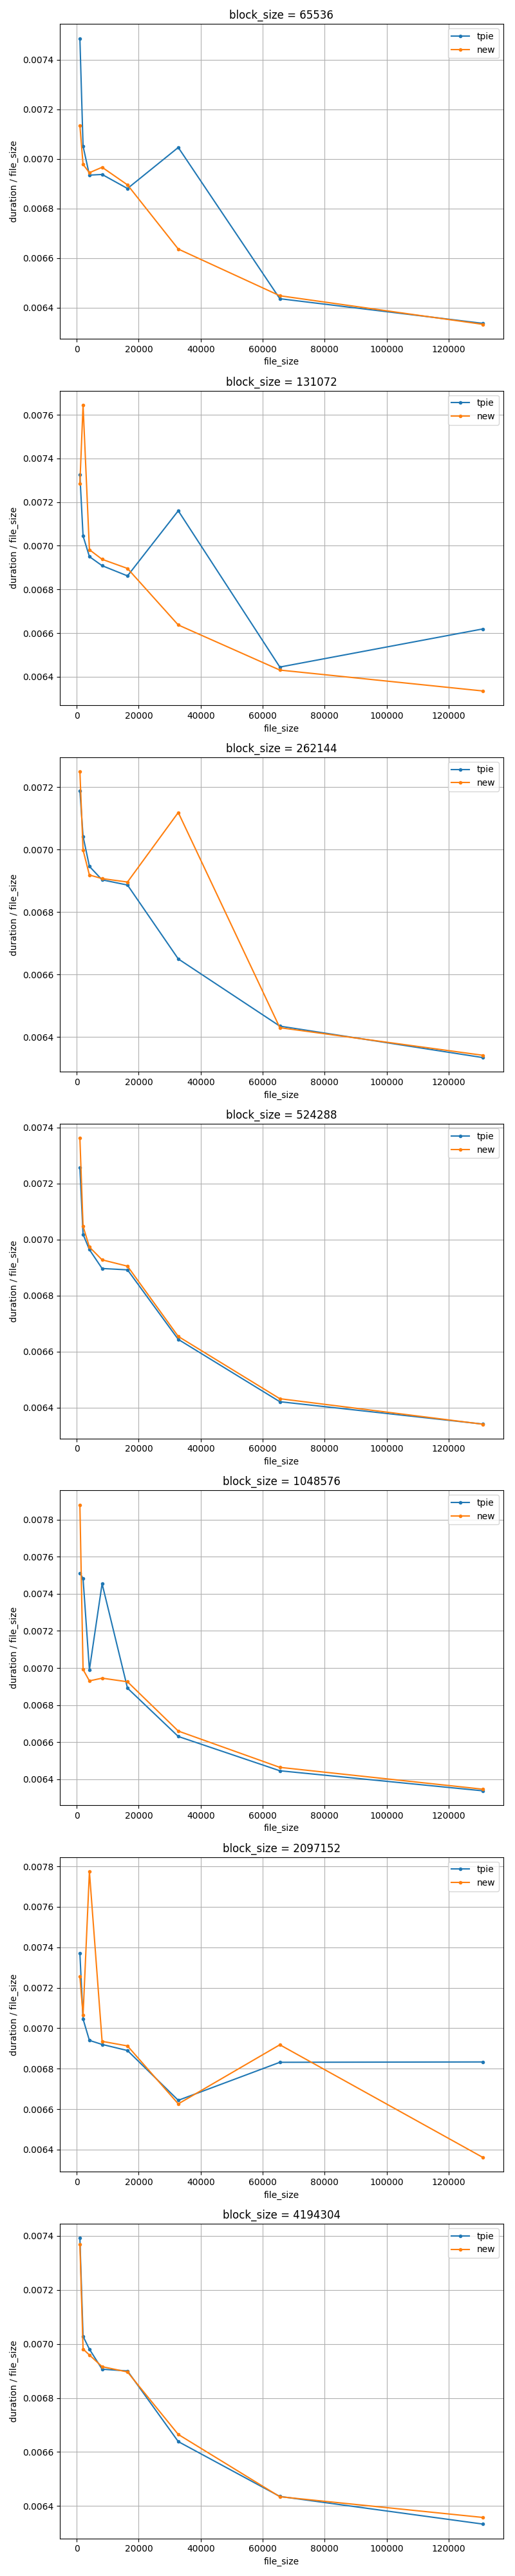

In [40]:
Y_axis = ('duration / file_size', lambda r: r.duration / r.file_size)
X_axis = ('file_size', lambda r: r.file_size)
others = ['block_size']
COLS = 1

timings = [
    ('tpie', '/home/asger/tmp/timing_tpie.db'),
    ('new', '/home/asger/tmp/timing_new.db'),
]

plot(X_axis, Y_axis, others, COLS, timings).show()

<IPython.core.display.Javascript object>


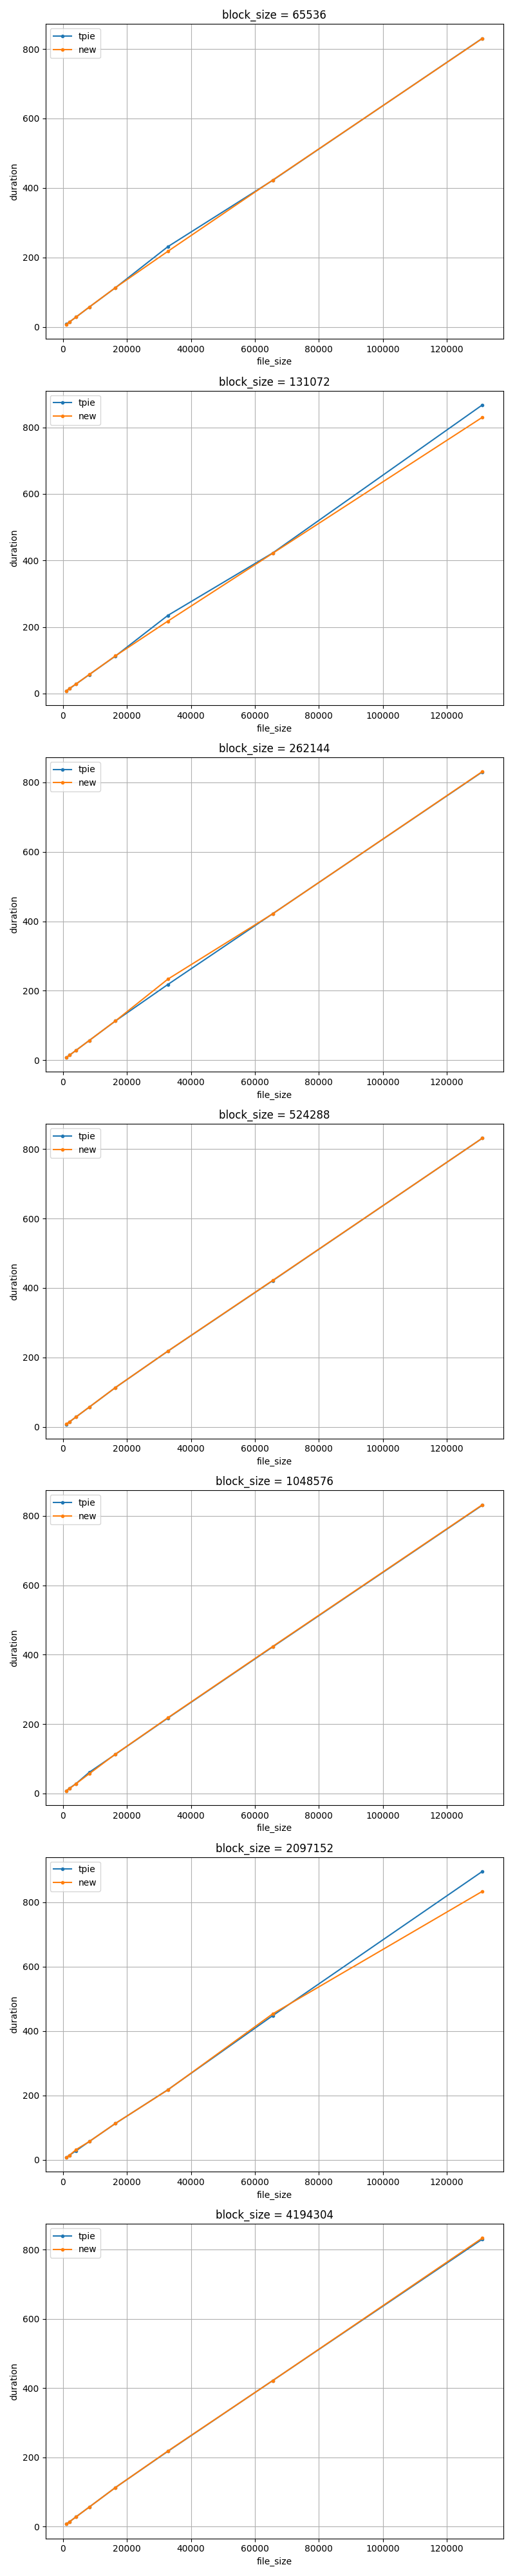

In [41]:
Y_axis = ('duration', lambda r: r.duration)
X_axis = ('file_size', lambda r: r.file_size)
others = ['block_size']
COLS = 1

timings = [
    ('tpie', '/home/asger/tmp/timing_tpie.db'),
    ('new', '/home/asger/tmp/timing_new.db'),
]

plot(X_axis, Y_axis, others, COLS, timings).show()

In [21]:
plt.grid()